# Análise CAGED

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
estabelecimento = pd.read_csv("CAGEDESTAB202104.txt", sep=";")
movimentacoes = pd.read_csv("CAGEDMOV202104.txt", sep=";")

In [3]:
estabelecimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707319 entries, 0 to 707318
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   competência          707319 non-null  int64 
 1   região               707319 non-null  int64 
 2   uf                   707319 non-null  int64 
 3   município            707319 non-null  int64 
 4   seção                707319 non-null  object
 5   subclasse            707319 non-null  int64 
 6   admitidos            707319 non-null  int64 
 7   desligados           707319 non-null  int64 
 8   fonte_desl           707319 non-null  int64 
 9   saldomovimentação    707319 non-null  int64 
 10  tipoempregador       707319 non-null  int64 
 11  tipoestabelecimento  707319 non-null  int64 
 12  tamestabjan          707319 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 70.2+ MB


In [4]:
movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642599 entries, 0 to 2642598
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   competência          int64  
 1   região               int64  
 2   uf                   int64  
 3   município            int64  
 4   seção                object 
 5   subclasse            int64  
 6   saldomovimentação    int64  
 7   cbo2002ocupação      int64  
 8   categoria            int64  
 9   graudeinstrução      int64  
 10  idade                float64
 11  horascontratuais     int64  
 12  raçacor              int64  
 13  sexo                 int64  
 14  tipoempregador       int64  
 15  tipoestabelecimento  int64  
 16  tipomovimentação     int64  
 17  tipodedeficiência    int64  
 18  indtrabintermitente  int64  
 19  indtrabparcial       int64  
 20  salário              float64
 21  tamestabjan          int64  
 22  indicadoraprendiz    int64  
 23  fonte                int64  
dty

## Índice de pessoas empregadas e desempregadas em Abril de 2021 por Gênero

In [5]:
#códigos de admissão: 10, 20, 25, 35, 70, 
#códigos de desligamentos: 31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98
#código não identificado: 99

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['sexo'], movimentacoes['tipomovimentação']], axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

         sexo  tipomovimentação
0           1                20
1           1                10
2           1                20
3           3                20
4           1                99
...       ...               ...
2642594     1                31
2642595     1                31
2642596     3                31
2642597     1                31
2642598     1                20

[2642599 rows x 2 columns]


In [6]:
quant = result.shape[0]
empregado = 0
empregada = 0
desempregado = 0
desempregada = 0
NaNH = 0
NaNM = 0

admissao = [10, 20, 25, 35, 70]
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98]


i = 0
while i < quant:
    if(result['sexo'][i] == 1):
        if(result['tipomovimentação'][i] in admissao):
            empregado = empregado + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregado = desempregado + 1
        else:
            NaNH = NaNH + 1
    elif(result['sexo'][i] == 3):
        if(result['tipomovimentação'][i] in admissao):
            empregada = empregada + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregada = desempregada + 1
        else:
            NaNM = NaNM + 1
    i = i + 1


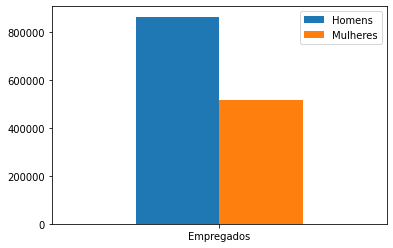

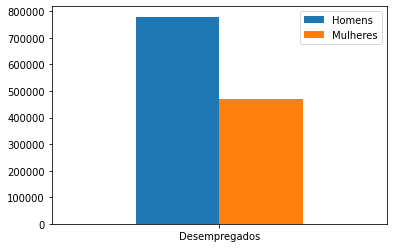

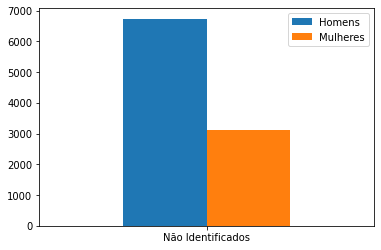

In [7]:
# Criando um dicionário

dataE = {"Homens":[empregado], "Mulheres":[empregada]};
dataD = {"Homens":[desempregado], "Mulheres":[desempregada]};
dataN = {"Homens":[NaNH], "Mulheres":[NaNM]};

indexE     = ["Empregados"];
indexD     = ["Desempregados"];
indexN     = ["Não Identificados"]; 

# Dictionary loaded into a DataFrame       

dataFrameE = pd.DataFrame(data=dataE, index=indexE);
dataFrameD = pd.DataFrame(data=dataD, index=indexD);
dataFrameN = pd.DataFrame(data=dataN, index=indexN); 

# Draw a vertical bar chart

dataFrameE.plot.bar(rot=0, title="");
dataFrameD.plot.bar(rot=0, title="");
dataFrameN.plot.bar(rot=0, title="");

## Índice de pessoas empregadas e desempregadas em Abril de 2021 por Classe social

In [8]:
# Definições da Classes Sociais (IBGE)
# A = R$ 20.900,01 ou mais
# B = R$ 10.450,01 a R$ 20.900,00
# C = R$ 4.180,01 a R$ 10.450,00
# D = R$ 2.090,01 a R$ 4.180,00
# E = Até R$ 2.090,00


#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['salário'], movimentacoes['tipomovimentação']], axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

             salário  tipomovimentação
0        1800.000000                20
1        1634.599976                10
2        1775.410034                20
3        1850.000000                20
4        1586.199951                99
...              ...               ...
2642589  1440.000000                31
2642590  1167.119995                31
2642591  1303.000000                31
2642592  2056.560059                31
2642593  1188.310059                20

[2642594 rows x 2 columns]


In [9]:
quant = result.shape[0]
#Lista com índices específicos para cada classe social
# 0: A; 1: B; 2: C; 3: D; 4: E 
empregados = [0, 0, 0, 0, 0]
desempregados = [0, 0, 0, 0, 0]
NaN = [0, 0, 0, 0, 0]

admissao = [10, 20, 25, 35, 70]
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98]

i = 0
while i < quant:
    if(result['salário'][i] >= 20900.01):
        if(result['tipomovimentação'][i] in admissao):
            empregados[0] = empregados[0] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[0] = desempregados[0] + 1
        else:
            NaN[0] = NaN[0] + 1
            
    elif(10450.01 <=result['salário'][i] <= 20900.00):
        if(result['tipomovimentação'][i] in admissao):
            empregados[1] = empregados[1] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[1] = desempregados[1] + 1
        else:
             NaN[1] = NaN[1] + 1
            
    elif(4180.01 <= result['salário'][i] <= 10450.00):
        if(result['tipomovimentação'][i] in admissao):
            empregados[2] = empregados[2] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[2] = desempregados[2] + 1
        else:
             NaN[2] = NaN[2] + 1
            
    elif(2090.01 <= result['salário'][i] <= 4180.00):
        if(result['tipomovimentação'][i] in admissao):
            empregados[3] = empregados[3] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[3] = desempregados[3] + 1
        else:
             NaN[3] = NaN[3] + 1
            
    elif(result['salário'][i] <= 2090.00):
        if(result['tipomovimentação'][i] in admissao):
            empregados[4] = empregados[4] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[4] = desempregados[4] + 1
        else:
             NaN[4] = NaN[4] + 1
    
    i = i + 1

print("Empregados:", empregados)
print("Desempregados:", desempregados)
print("Não Identificados:", NaN)

Empregados: [4699, 10027, 49986, 169706, 1147349]
Desempregados: [4407, 6917, 40279, 133812, 1065574]
Não Identificados: [2, 14, 230, 1662, 7930]


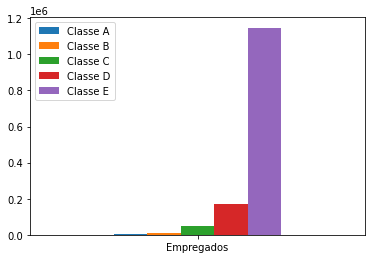

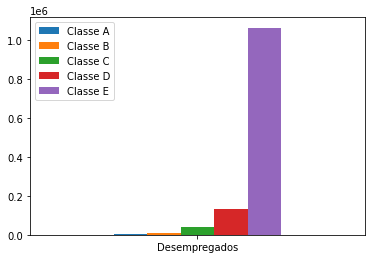

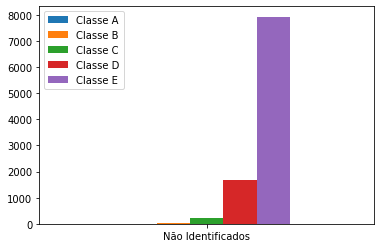

In [10]:
# Criando um dicionário

dataE = {"Classe A":[empregados[0]], "Classe B":[empregados[1]], "Classe C":[empregados[2]], "Classe D":[empregados[3]], 
         "Classe E":[empregados[4]]};

dataD = {"Classe A":[desempregados[0]], "Classe B":[desempregados[1]], "Classe C":[desempregados[2]], "Classe D":[desempregados[3]], 
         "Classe E":[desempregados[4]]};

dataN = {"Classe A":[NaN[0]], "Classe B":[NaN[1]], "Classe C":[NaN[2]], "Classe D":[NaN[3]], "Classe E":[NaN[4]]};

indexE     = ["Empregados"];
indexD     = ["Desempregados"];
indexN     = ["Não Identificados"]; 

# Dictionary loaded into a DataFrame       

dataFrameE = pd.DataFrame(data=dataE, index=indexE);
dataFrameD = pd.DataFrame(data=dataD, index=indexD);
dataFrameN = pd.DataFrame(data=dataN, index=indexN);

# Draw a vertical bar chart

dataFrameE.plot.bar(rot=0, title="");
dataFrameD.plot.bar(rot=0, title="");
dataFrameN.plot.bar(rot=0, title="");

## Índice de pessoas empregadas e desempregadas em Abril de 2021 por Faixa etária

In [11]:
# Definições de Faixa etária
# Até 19 anos - Jovens
# De 20 a 59 - Adultos
# Mais de 60 - Idosos

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['idade'], movimentacoes['tipomovimentação']], axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

         idade  tipomovimentação
0         37.0                20
1         18.0                10
2         32.0                20
3         27.0                20
4         45.0                99
...        ...               ...
2642587   44.0                31
2642588   22.0                31
2642589   23.0                31
2642590   46.0                31
2642591   19.0                20

[2642592 rows x 2 columns]


In [12]:
quant = result.shape[0]
#Lista com índices específicos para cada faixa etária
# 0: Jovem; 1: Adulto; 2: Idoso
empregados = [0, 0, 0]
desempregados = [0, 0, 0]
NaN = [0, 0, 0]

admissao = [10, 20, 25, 35, 70]
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98]

i = 0
while i < quant:
    if(result['idade'][i] <= 19):
        if(result['tipomovimentação'][i] in admissao):
            empregados[0] = empregados[0] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[0] = desempregados[0] + 1
        elif(result['tipomovimentação'][i] == 99):
            NaN[0] = NaN[0] + 1
            
    elif(20 <=result['idade'][i] <= 59):
        if(result['tipomovimentação'][i] in admissao):
            empregados[1] = empregados[1] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[1] = desempregados[1] + 1
        elif(result['tipomovimentação'][i] == 99):
            NaN[1] = NaN[1] + 1
            
    elif(result['idade'][i] >= 60):
        if(result['tipomovimentação'][i] in admissao):
            empregados[2] = empregados[2] + 1
        elif(result['tipomovimentação'][i] in desligamento):
            desempregados[2] = desempregados[2] + 1
        elif(result['tipomovimentação'][i] == 99):
            NaN[2] = NaN[2] + 1
            
    
    i = i + 1
    
print("Empregados:", empregados)
print("Desempregados:", desempregados)
print("Não Identificados:", NaN)

Empregados: [100524, 1265179, 16064]
Desempregados: [51410, 1170856, 28728]
Não Identificados: [250, 9377, 204]


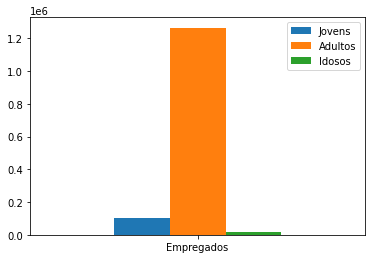

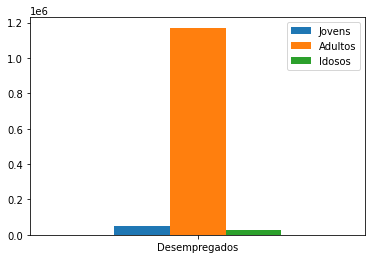

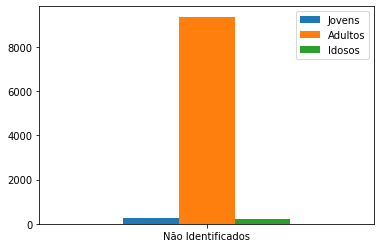

In [13]:
# Criando um dicionário

dataE = {"Jovens":[empregados[0]], "Adultos":[empregados[1]], "Idosos":[empregados[2]]};
dataD = {"Jovens":[desempregados[0]], "Adultos":[desempregados[1]], "Idosos":[desempregados[2]]};
dataN = {"Jovens":[NaN[0]], "Adultos":[NaN[1]], "Idosos":[NaN[2]]};

indexE     = ["Empregados"];
indexD     = ["Desempregados"];
indexN    = ["Não Identificados"];

 

# Dictionary loaded into a DataFrame       

dataFrameE = pd.DataFrame(data=dataE, index=indexE);
dataFrameD = pd.DataFrame(data=dataD, index=indexD);
dataFrameN = pd.DataFrame(data=dataN, index=indexN); 

# Draw a vertical bar chart

dataFrameE.plot.bar(rot=0, title="");
dataFrameD.plot.bar(rot=0, title="");
dataFrameN.plot.bar(rot=0, title="");

## Índice de pessoas empregadas e desempregadas em Abril de 2021 por Grau de instrução

In [14]:
# Níveis de escolaridade
# Analfabeto - 1
# Até 5ª Incompleto - 2
# 5ª Completo Fundamental - 3
# 6ª a 9ª Fundamental - 4
# Fundamental Completo - 5
# Médio Incompleto - 6
# Médio Completo - 7 
# Superior Incompleto - 8
# Superior Completo - 9
# Mestrado - 10
# Doutorado - 11
# Pós-Graduação completa - 80
# Não Identificado - 99

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['graudeinstrução'], movimentacoes['tipomovimentação']], axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

         graudeinstrução  tipomovimentação
0                      7                20
1                      6                10
2                      7                20
3                      7                20
4                      2                99
...                  ...               ...
2642594                7                31
2642595                6                31
2642596                7                31
2642597                6                31
2642598                6                20

[2642599 rows x 2 columns]


In [15]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]
#Lista com índices específicos para cada grau de instrução
empregados = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
desempregados = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NaN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Lista para identificação de códigos para cada grau de instrução
codigos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 80, 99]

#Lista para identificação de admissões e desligamentos
admissao = [10, 20, 25, 35, 70]
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98]


for x in range(quant):
    i = 0
    index = 0
    for y in codigos:
        if(result['graudeinstrução'][x] == y):
            index = i
            break
        i = i + 1
    if result['tipomovimentação'][x] in admissao:
        empregados [index] = empregados[index] + 1
    elif result['tipomovimentação'][x] in desligamento:
        desempregados[index] = desempregados[index] + 1
    else:
        NaN[index] = NaN[index] + 1  
        
print("Empregados:", empregados)
print("Desempregados:", desempregados)
print("Não Identificados:", NaN)

Empregados: [5665, 29469, 23555, 63705, 103238, 101443, 827938, 62531, 144041, 2800, 982, 16400, 0]
Desempregados: [6129, 31124, 25882, 66399, 104814, 96772, 732171, 52751, 119071, 1991, 699, 13191, 0]
Não Identificados: [34, 212, 162, 482, 808, 584, 6689, 244, 619, 2, 0, 2, 0]


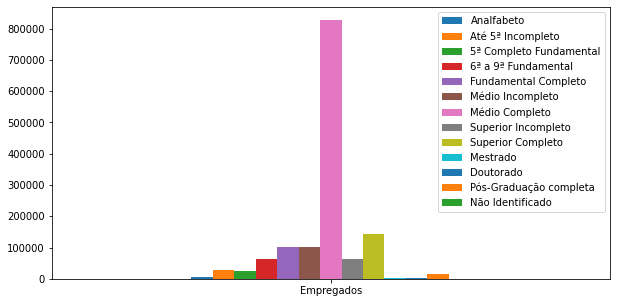

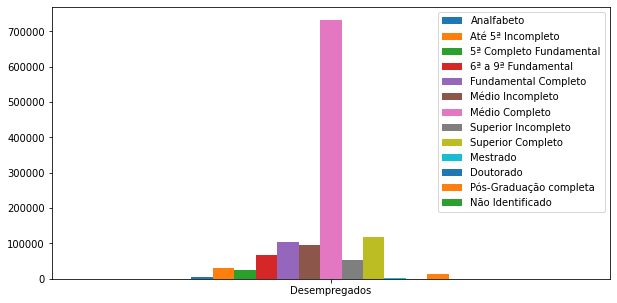

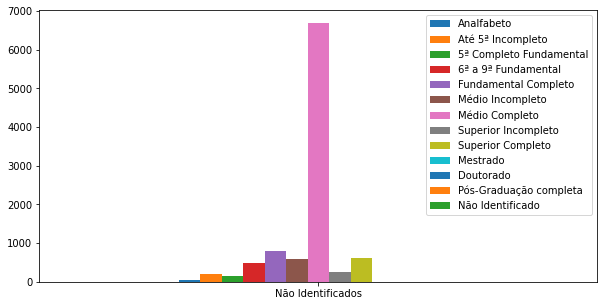

In [16]:
# Criando um dicionário

dataE = {"Analfabeto":[empregados[0]], "Até 5ª Incompleto":[empregados[1]], "5ª Completo Fundamental":[empregados[2]],
        "6ª a 9ª Fundamental":[empregados[3]], "Fundamental Completo":[empregados[4]], "Médio Incompleto":[empregados[5]],
        "Médio Completo":[empregados[6]], "Superior Incompleto":[empregados[7]], "Superior Completo":[empregados[8]], 
        "Mestrado":[empregados[9]], "Doutorado":[empregados[10]], "Pós-Graduação completa":[empregados[11]], 
        "Não Identificado":[empregados[12]]};

dataD = {"Analfabeto":[desempregados[0]], "Até 5ª Incompleto":[desempregados[1]], "5ª Completo Fundamental":[desempregados[2]],
        "6ª a 9ª Fundamental":[desempregados[3]], "Fundamental Completo":[desempregados[4]], "Médio Incompleto":[desempregados[5]],
        "Médio Completo":[desempregados[6]], "Superior Incompleto":[desempregados[7]], "Superior Completo":[desempregados[8]], 
        "Mestrado":[desempregados[9]], "Doutorado":[desempregados[10]], "Pós-Graduação completa":[desempregados[11]], 
        "Não Identificado":[desempregados[12]]};

dataN = {"Analfabeto":[NaN[0]], "Até 5ª Incompleto":[NaN[1]], "5ª Completo Fundamental":[NaN[2]],
        "6ª a 9ª Fundamental":[NaN[3]], "Fundamental Completo":[NaN[4]], "Médio Incompleto":[NaN[5]],
        "Médio Completo":[NaN[6]], "Superior Incompleto":[NaN[7]], "Superior Completo":[NaN[8]], 
        "Mestrado":[NaN[9]], "Doutorado":[NaN[10]], "Pós-Graduação completa":[NaN[11]], 
        "Não Identificado":[NaN[12]]};

indexE     = ["Empregados"];
indexD     = ["Desempregados"];
indexN     = ["Não Identificados"];
 

# Dictionary loaded into a DataFrame       

dataFrameE = pd.DataFrame(data=dataE, index=indexE);
dataFrameD = pd.DataFrame(data=dataD, index=indexD);
dataFrameN = pd.DataFrame(data=dataN, index=indexN); 

# Draw a vertical bar chart

dataFrameE.plot.bar(rot=0, title="", figsize=(10,5));
dataFrameD.plot.bar(rot=0, title="", figsize=(10,5));
dataFrameN.plot.bar(rot=0, title="", figsize=(10,5));

## Índice de pessoas empregadas e desempregadas em Abril de 2021 por Setores

In [17]:
# Lista de Setores
# A - Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura
# B - Indústrias Extrativas
# C - Indústrias de Transformação
# D - Eletricidade e Gás
# E - Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação
# F - Construção
# G - Comércio, Reparação de Veículos Automotores e Motocicletas
# H - Transporte, Armazenagem e Correio
# I - Alojamento e Alimentação
# J - Informação e Comunicação
# K - Atividades Financeiras, de Seguros e Serviços Relacionados
# L - Atividades Imobiliárias
# M - Atividades Profissionais, Científicas e Técnicas
# N - Atividades Administrativas e Serviços Complementares
# O - Administração Pública, Defesa e Seguridade Social
# P - Educação
# Q - Saúde Humana e Serviços Sociais
# R - Artes, Cultura, Esporte e Recreação
# S - Outras Atividades de Serviços
# T - Serviços Domésticos
# U - Organismos Internacionais e Outras Instituições Extraterritoriais
# Z - Não identificado

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['seção'], movimentacoes['tipomovimentação']], axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

        seção  tipomovimentação
0           G                20
1           N                10
2           N                20
3           G                20
4           F                99
...       ...               ...
2642594     H                31
2642595     H                31
2642596     G                31
2642597     F                31
2642598     G                20

[2642599 rows x 2 columns]


In [18]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada SETOR
empregados = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
desempregados = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
NaN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Lista para identificação de códigos para cada grau de instrução
codigos = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "Z"]

#Lista para identificação de admissões e desligamentos
admissao = [10, 20, 25, 35, 70]
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98]


for x in range(quant):
    i = 0
    index = 0
    for y in codigos:
        if(result['seção'][x] == y):
            index = i
            break
        i = i + 1
    if result['tipomovimentação'][x] in admissao:
        empregados [index] = empregados[index] + 1
    elif result['tipomovimentação'][x] in desligamento:
        desempregados[index] = desempregados[index] + 1
    else:
        NaN[index] = NaN[index] + 1  
        
print("Empregados:", empregados)
print("Desempregados:", desempregados)
print("Não Identificados:", NaN)

Empregados: [84650, 5615, 226371, 1922, 7660, 146389, 294287, 77050, 43016, 37601, 20468, 5566, 55003, 218239, 5197, 31201, 89710, 4751, 26874, 168, 29, 0]
Desempregados: [73418, 3291, 207504, 1485, 8243, 122069, 282014, 71992, 65391, 27290, 13882, 4014, 42071, 212439, 3540, 25722, 59103, 6339, 21095, 71, 21, 0]
Não Identificados: [87, 27, 1076, 0, 58, 2096, 2149, 548, 604, 151, 28, 74, 436, 1504, 1, 265, 348, 52, 282, 0, 0, 52]


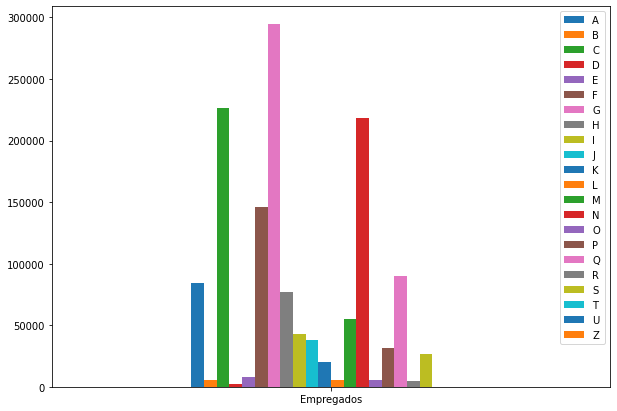

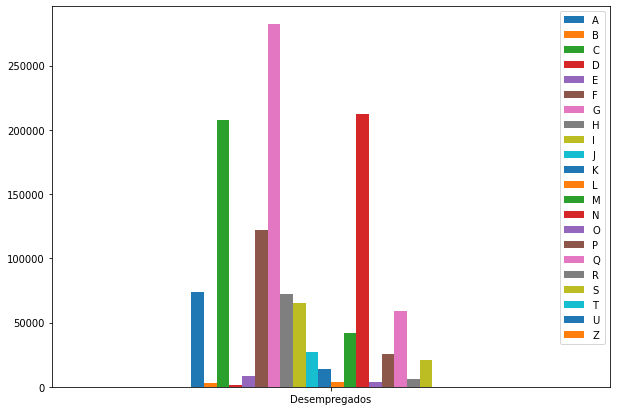

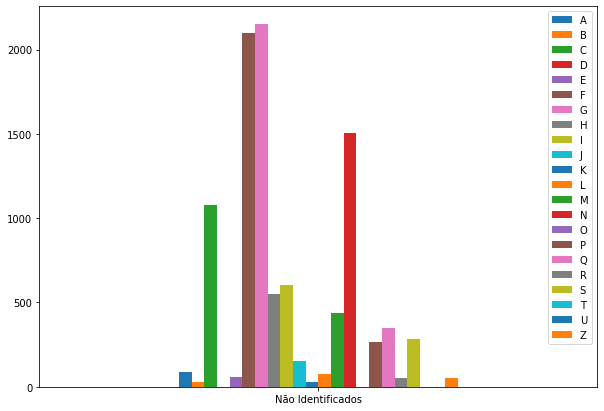

In [19]:
# Criando um dicionário

dataEmpregados = {"A":[empregados[0]], "B":[empregados[1]], "C":[empregados[2]], "D":[empregados[3]], "E":[empregados[4]],
                  "F":[empregados[5]], "G":[empregados[6]], "H":[empregados[7]], "I":[empregados[8]], "J":[empregados[9]],
                  "K":[empregados[10]], "L":[empregados[11]], "M":[empregados[12]],"N":[empregados[13]], "O":[empregados[14]],
                  "P":[empregados[15]], "Q":[empregados[16]], "R":[empregados[17]], "S":[empregados[18]], "T":[empregados[19]],
                  "U":[empregados[20]], "Z":[empregados[21]]};

dataDesempregados = {"A":[desempregados[0]], "B":[desempregados[1]], "C":[desempregados[2]], "D":[desempregados[3]], "E":[desempregados[4]],
                  "F":[desempregados[5]], "G":[desempregados[6]], "H":[desempregados[7]], "I":[desempregados[8]], "J":[desempregados[9]],
                  "K":[desempregados[10]], "L":[desempregados[11]], "M":[desempregados[12]],"N":[desempregados[13]], "O":[desempregados[14]],
                  "P":[desempregados[15]], "Q":[desempregados[16]], "R":[desempregados[17]], "S":[desempregados[18]], "T":[desempregados[19]],
                  "U":[desempregados[20]], "Z":[desempregados[21]]};

dataNaN = {"A":[NaN[0]], "B":[NaN[1]], "C":[NaN[2]], "D":[NaN[3]], "E":[NaN[4]],
                  "F":[NaN[5]], "G":[NaN[6]], "H":[NaN[7]], "I":[NaN[8]], "J":[NaN[9]],
                  "K":[NaN[10]], "L":[NaN[11]], "M":[NaN[12]],"N":[NaN[13]], "O":[NaN[14]],
                  "P":[NaN[15]], "Q":[NaN[16]], "R":[NaN[17]], "S":[NaN[18]], "T":[NaN[19]],
                  "U":[NaN[20]], "Z":[NaN[21]]};

indexEmpregados = ["Empregados"];
indexDesempregados = ["Desempregados"];
indexNaN = ["Não Identificados"];

 

# Dictionary loaded into a DataFrame       

dataFrameE = pd.DataFrame(data=dataEmpregados, index=indexEmpregados);
dataFrameD = pd.DataFrame(data=dataDesempregados, index=indexDesempregados);
dataFrameN = pd.DataFrame(data=dataNaN, index=indexNaN);
 

# Draw a vertical bar chart

dataFrameE.plot.bar(rot=0, title="", figsize=(10,7));
dataFrameD.plot.bar(rot=0, title="", figsize=(10,7));
dataFrameN.plot.bar(rot=0, title="", figsize=(10,7));

## Estatísticas de consumo/gastos em Abril de 2021

In [20]:
data = {'Período/Ano':  ['Maio/2020', 'Abril/2021'],
        'Total de Gastos': ['50.978.852,98', '69.666.234,39'],
        }

df = pd.DataFrame (data, columns = ['Período/Ano','Total de Gastos'])

print (df)

  Período/Ano Total de Gastos
0   Maio/2020   50.978.852,98
1  Abril/2021   69.666.234,39


## Índices de causas de demissões em Abril de 2021

### Distribuídas por gênero

In [21]:
# Lista das causas de Demissões
# Desligamento por demissão sem justa causa - 31
# Desligamento por demissão com justa causa - 32
# Culpa Recíproca - 33
# Desligamento a pedido - 40
# Término contrato trabalho prazo determinado - 43
# Desligamento por Término de contrato - 45
# Desligamento por aposentadoria - 50
# Desligamento por morte - 60
# Desligamento por transferência - 80
# Desligamento por Acordo entre empregado e empregador - 90
# Desligamento de Tipo Ignorado - 98

In [22]:
# Lista de Gêneros
# Homem - 1
# Mulher - 3
# Não Identificado - 9

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['sexo'], movimentacoes['raçacor'], movimentacoes['idade'], movimentacoes['tipomovimentação']],  axis=1)
result = result.dropna()
result = result.reset_index(drop=True)
print(result)

         sexo  raçacor  idade  tipomovimentação
0           1        6   37.0                20
1           1        2   18.0                10
2           1        3   32.0                20
3           3        6   27.0                20
4           1        9   45.0                99
...       ...      ...    ...               ...
2642587     1        6   44.0                31
2642588     1        3   22.0                31
2642589     3        1   23.0                31
2642590     1        3   46.0                31
2642591     1        1   19.0                20

[2642592 rows x 4 columns]


In [23]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de demissão
demitidos = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
demitidas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Lista para identificação de códigos para gênero
codigos = [1, 3, 9]

#Lista para identificação de desligamentos
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]


for x in range(quant):
    i = 0
    j = 0
    genero = 0
    index = 0
    for y in codigos:
        if(result['sexo'][x] == y):
            genero = y
            break
        i = i + 1
    for z in desligamento:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
    if(genero == 1):
        demitidos[index] = demitidos[index] + 1
    elif(genero == 3):
        demitidas[index] = demitidas[index] + 1
        
soma = 0
for a in demitidos:
    soma = soma + a
    
    
for c in demitidas:
    soma = soma + c
    
print("Demitidos:",demitidos)
print("Demitidas:",demitidas)

Demitidos: [1270689, 10782, 1023, 200300, 139997, 3119, 941, 9028, 0, 9074, 81, 6733]
Demitidas: [743887, 4775, 469, 145445, 82645, 2076, 633, 2671, 0, 5104, 22, 3098]


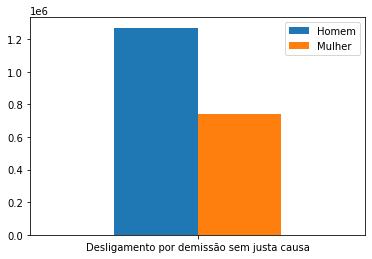

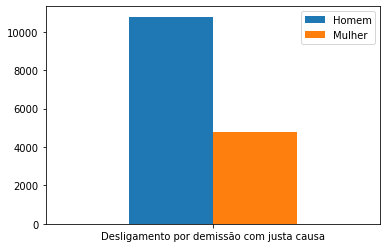

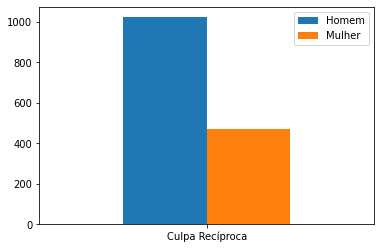

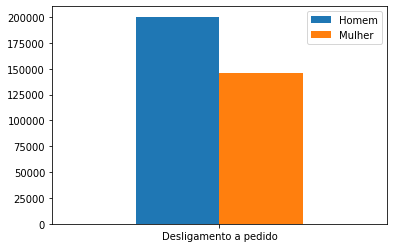

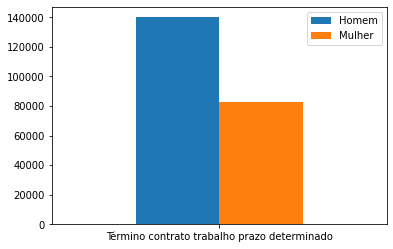

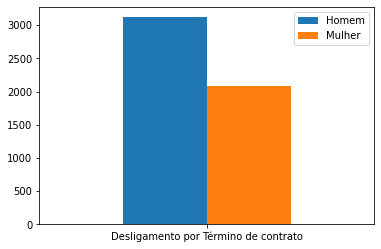

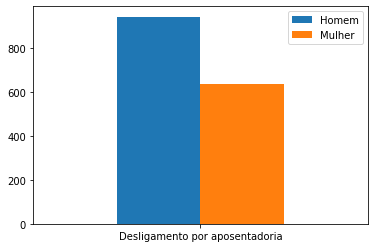

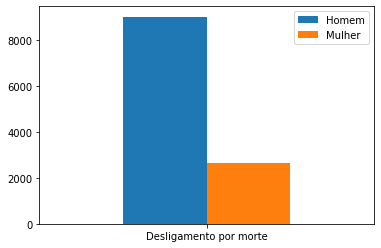

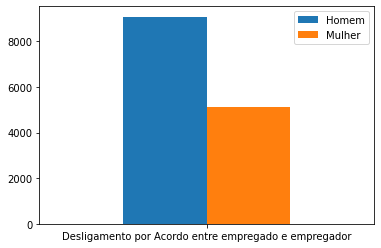

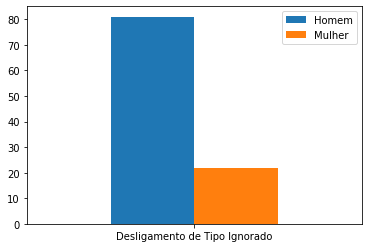

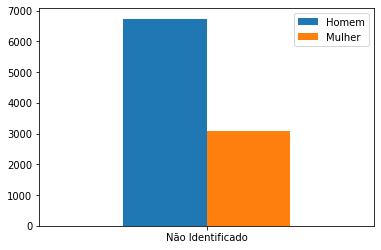

In [24]:
# Criando um dicionário

data31 = {"Homem":[demitidos[0]], "Mulher":[demitidas[0]]};
data32 = {"Homem":[demitidos[1]], "Mulher":[demitidas[1]]};
data33 = {"Homem":[demitidos[2]], "Mulher":[demitidas[2]]};
data40 = {"Homem":[demitidos[3]], "Mulher":[demitidas[3]]};
data43 = {"Homem":[demitidos[4]], "Mulher":[demitidas[4]]};
data45 = {"Homem":[demitidos[5]], "Mulher":[demitidas[5]]};
data50 = {"Homem":[demitidos[6]], "Mulher":[demitidas[6]]};
data60 = {"Homem":[demitidos[7]], "Mulher":[demitidas[7]]};
data90 = {"Homem":[demitidos[9]], "Mulher":[demitidas[9]]};
data98 = {"Homem":[demitidos[10]], "Mulher":[demitidas[10]]};
data99 = {"Homem":[demitidos[11]], "Mulher":[demitidas[11]]};

index31     = ["Desligamento por demissão sem justa causa"];
index32     = ["Desligamento por demissão com justa causa"];
index33     = ["Culpa Recíproca"];
index40    = ["Desligamento a pedido"];
index43     = ["Término contrato trabalho prazo determinado"];
index45     = ["Desligamento por Término de contrato"];
index50     = ["Desligamento por aposentadoria"];
index60     = ["Desligamento por morte"];
index90     = ["Desligamento por Acordo entre empregado e empregador"];
index98    = ["Desligamento de Tipo Ignorado"];
index99     = ["Não Identificado"];

# Dictionary loaded into a DataFrame       

dataFrame31 = pd.DataFrame(data=data31, index=index31);
dataFrame32 = pd.DataFrame(data=data32, index=index32);
dataFrame33 = pd.DataFrame(data=data33, index=index33);
dataFrame40 = pd.DataFrame(data=data40, index=index40);
dataFrame43 = pd.DataFrame(data=data43, index=index43);
dataFrame45 = pd.DataFrame(data=data45, index=index45);
dataFrame50 = pd.DataFrame(data=data50, index=index50);
dataFrame60 = pd.DataFrame(data=data60, index=index60);
dataFrame90 = pd.DataFrame(data=data90, index=index90);
dataFrame98 = pd.DataFrame(data=data98, index=index98);
dataFrame99 = pd.DataFrame(data=data99, index=index99);
 

# Draw a vertical bar chart

dataFrame31.plot.bar(rot=0, title="");
dataFrame32.plot.bar(rot=0, title="");
dataFrame33.plot.bar(rot=0, title="");
dataFrame40.plot.bar(rot=0, title="");
dataFrame43.plot.bar(rot=0, title="");
dataFrame45.plot.bar(rot=0, title="");
dataFrame50.plot.bar(rot=0, title="");
dataFrame60.plot.bar(rot=0, title="");
dataFrame90.plot.bar(rot=0, title="");
dataFrame98.plot.bar(rot=0, title="");
dataFrame99.plot.bar(rot=0, title="");
        

        


### Distribuídas por raça/cor

In [25]:
# Lista de Raça/Cor
# Branca - 1
# Preta - 2
# Parda - 3
# Amarela - 4
# Indígena - 5
# Não informada - 6
# Não identificado - 9

In [27]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de demissão
branca = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
preta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
parda = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
amarela = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
indigena = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoInformado = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoIdentificado = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Lista para identificação de códigos para raça/cor
codigos = [1, 2, 3, 4, 5, 6, 9]

#Lista para identificação de desligamentos
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]


for x in range(quant):
    i = 0
    j = 0
    raca = 0
    index = 0
    for y in codigos:
        if(result['raçacor'][x] == y):
            raca = y
            break
        i = i + 1
    for z in desligamento:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
    if(raca == 1):
        branca[index] = branca[index] + 1
    elif(raca == 2):
        preta[index] = preta[index] + 1
    elif(raca == 3):
        parda[index] = parda[index] + 1
    elif(raca == 4):
        amarela[index] = amarela[index] + 1
    elif(raca == 5):
        indigena[index] = indigena[index] + 1
    elif(raca == 6):
        naoInformado[index] = naoInformado[index] + 1
    elif(raca == 9):
        naoIdentificado[index] = naoIdentificado[index] + 1
        
    
print("Branca:", branca)
print("Preta:", preta)
print("Parda:", parda)
print("Amarela:", amarela)
print("Indigena:", indigena)
print("Não Informada:", naoInformado)
print("Não Identificado:", naoIdentificado)

Branca: [749661, 5245, 490, 151997, 82007, 2052, 953, 5838, 0, 6332, 40, 0]
Preta: [118090, 1307, 105, 18031, 14347, 341, 73, 643, 0, 729, 8, 0]
Parda: [708122, 6330, 733, 102056, 81148, 1542, 362, 3669, 0, 4170, 42, 0]
Amarela: [9570, 88, 6, 2031, 920, 24, 23, 72, 0, 77, 0, 0]
Indigena: [3513, 40, 0, 607, 1696, 13, 3, 25, 0, 14, 0, 0]
Não Informada: [425620, 2547, 158, 71023, 42524, 1223, 160, 1452, 0, 2856, 13, 0]
Não Identificado: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9831]


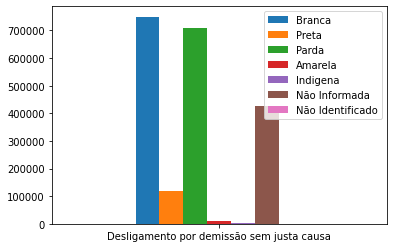

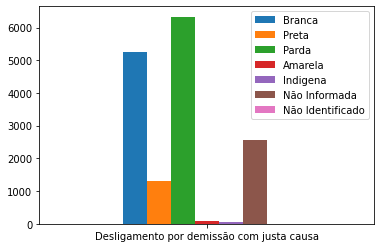

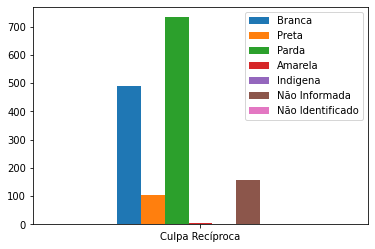

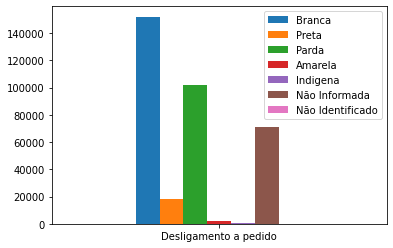

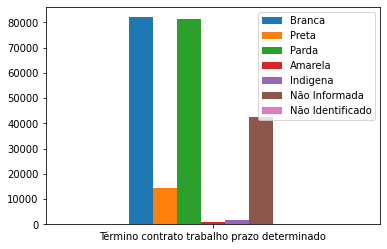

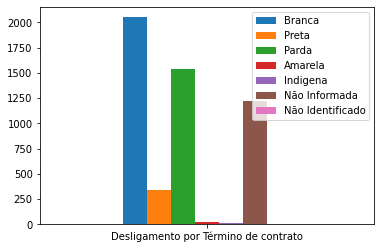

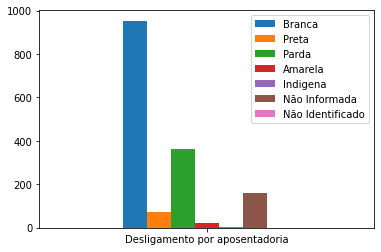

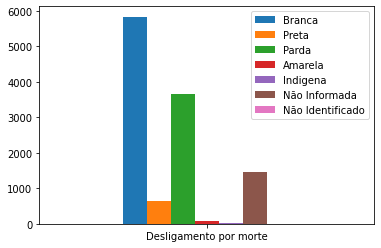

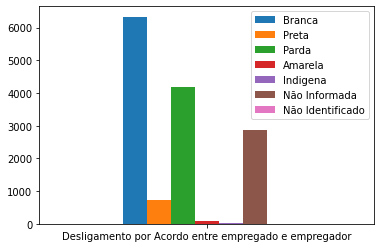

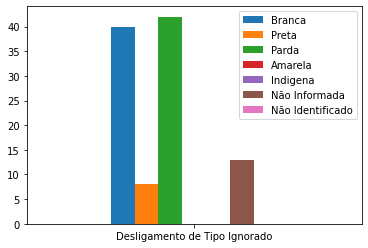

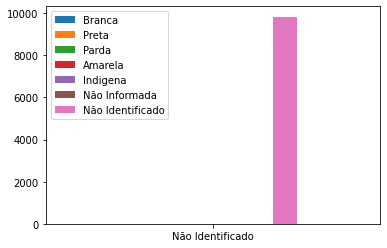

In [29]:
# Criando um dicionário

# Criando um dicionário

data31 = {"Branca":[branca[0]], "Preta":[preta[0]], "Parda":[parda[0]], "Amarela":[amarela[0]],
          "Indigena":[indigena[0]], "Não Informada":[naoInformado[0]],
          "Não Identificado":[naoIdentificado[0]],};
index31     = ["Desligamento por demissão sem justa causa"];
 
data32 = {"Branca":[branca[1]], "Preta":[preta[1]], "Parda":[parda[1]], "Amarela":[amarela[1]],
          "Indigena":[indigena[1]], "Não Informada":[naoInformado[1]],
          "Não Identificado":[naoIdentificado[1]],};
index32     = ["Desligamento por demissão com justa causa"];

data33 = {"Branca":[branca[2]], "Preta":[preta[2]], "Parda":[parda[2]], "Amarela":[amarela[2]],
          "Indigena":[indigena[2]], "Não Informada":[naoInformado[2]],
          "Não Identificado":[naoIdentificado[2]],};
index33     = ["Culpa Recíproca"];

data40 = {"Branca":[branca[3]], "Preta":[preta[3]], "Parda":[parda[3]], "Amarela":[amarela[3]],
          "Indigena":[indigena[3]], "Não Informada":[naoInformado[3]],
          "Não Identificado":[naoIdentificado[3]],};
index40     = ["Desligamento a pedido"];

data43 = {"Branca":[branca[4]], "Preta":[preta[4]], "Parda":[parda[4]], "Amarela":[amarela[4]],
          "Indigena":[indigena[4]], "Não Informada":[naoInformado[4]],
          "Não Identificado":[naoIdentificado[4]],};
index43     = ["Término contrato trabalho prazo determinado"];

data45 = {"Branca":[branca[5]], "Preta":[preta[5]], "Parda":[parda[5]], "Amarela":[amarela[5]],
          "Indigena":[indigena[5]], "Não Informada":[naoInformado[5]],
          "Não Identificado":[naoIdentificado[2]],};
index45     = ["Desligamento por Término de contrato"];

data50 = {"Branca":[branca[6]], "Preta":[preta[6]], "Parda":[parda[6]], "Amarela":[amarela[6]],
          "Indigena":[indigena[6]], "Não Informada":[naoInformado[6]],
          "Não Identificado":[naoIdentificado[6]],};
index50     = ["Desligamento por aposentadoria"];

data60 = {"Branca":[branca[7]], "Preta":[preta[7]], "Parda":[parda[7]], "Amarela":[amarela[7]],
          "Indigena":[indigena[7]], "Não Informada":[naoInformado[7]],
          "Não Identificado":[naoIdentificado[2]],};
index60     = ["Desligamento por morte"];


data90 = {"Branca":[branca[9]], "Preta":[preta[9]], "Parda":[parda[9]], "Amarela":[amarela[9]],
          "Indigena":[indigena[9]], "Não Informada":[naoInformado[9]],
          "Não Identificado":[naoIdentificado[9]],};
index90     = ["Desligamento por Acordo entre empregado e empregador"];

data98 = {"Branca":[branca[10]], "Preta":[preta[10]], "Parda":[parda[10]], "Amarela":[amarela[10]],
          "Indigena":[indigena[10]], "Não Informada":[naoInformado[10]],
          "Não Identificado":[naoIdentificado[10]],};
index98     = ["Desligamento de Tipo Ignorado"];

data99 = {"Branca":[branca[11]], "Preta":[preta[11]], "Parda":[parda[11]], "Amarela":[amarela[11]],
          "Indigena":[indigena[11]], "Não Informada":[naoInformado[11]],
          "Não Identificado":[naoIdentificado[11]],};
index99     = ["Não Identificado"];
# Dictionary loaded into a DataFrame       

dataFrame31 = pd.DataFrame(data=data31, index=index31);
dataFrame32 = pd.DataFrame(data=data32, index=index32);
dataFrame33 = pd.DataFrame(data=data33, index=index33);
dataFrame40 = pd.DataFrame(data=data40, index=index40);
dataFrame43 = pd.DataFrame(data=data43, index=index43);
dataFrame45 = pd.DataFrame(data=data45, index=index45);
dataFrame50 = pd.DataFrame(data=data50, index=index50);
dataFrame60 = pd.DataFrame(data=data60, index=index60);
dataFrame90 = pd.DataFrame(data=data90, index=index90);
dataFrame98 = pd.DataFrame(data=data98, index=index98);
dataFrame99 = pd.DataFrame(data=data99, index=index99);

 
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]
# Draw a vertical bar chart
dataFrame31.plot.bar(rot=0, title="");
dataFrame32.plot.bar(rot=0, title="");
dataFrame33.plot.bar(rot=0, title="");
dataFrame40.plot.bar(rot=0, title="");
dataFrame43.plot.bar(rot=0, title="");
dataFrame45.plot.bar(rot=0, title="");
dataFrame50.plot.bar(rot=0, title="");
dataFrame60.plot.bar(rot=0, title="");
dataFrame90.plot.bar(rot=0, title="");
dataFrame98.plot.bar(rot=0, title="");
dataFrame99.plot.bar(rot=0, title="");



### Distribuídas por faixa etária

In [30]:
# Definições de Faixa etária
# Até 19 anos - Jovens
# De 20 a 59 - Adultos
# Mais de 60 - Idosos

In [31]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de demissão
jovem = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
adulto = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
idoso = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Lista para identificação de desligamentos
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]


for x in range(quant):
    j = 0
    genero = 0
    index = 0
    for z in desligamento:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
        
    if(result['idade'][x] <= 19):
        jovem[index] = jovem[index] + 1
    elif(20 <= result['idade'][x] <= 59):
        adulto[index] = adulto[index] + 1
    elif(result['idade'][x] >= 60):
        idoso[index] = idoso[index] + 1
        
    
print("Jovem:",jovem)
print("Adulto:",adulto)
print("Idoso:",idoso)

Jovem: [113414, 500, 102, 16899, 20368, 408, 51, 34, 0, 157, 1, 250]
Adulto: [1868449, 14844, 1354, 323115, 199794, 4707, 1386, 8977, 0, 13326, 83, 9377]
Idoso: [32713, 213, 36, 5731, 2480, 80, 137, 2688, 0, 695, 19, 204]


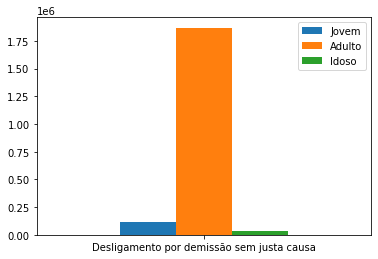

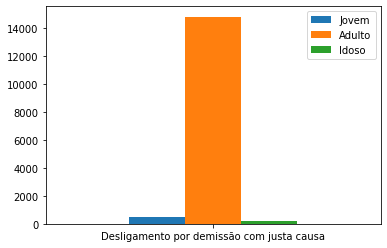

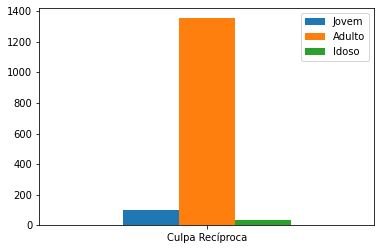

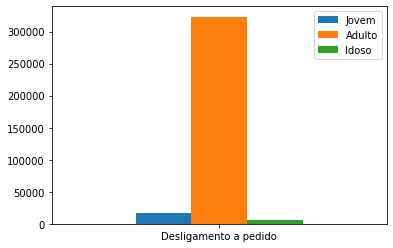

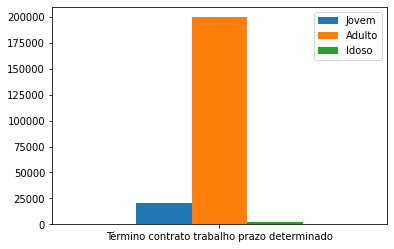

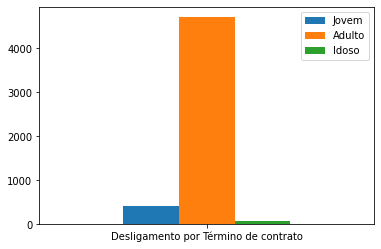

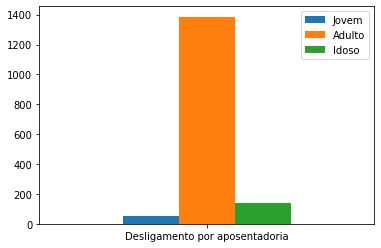

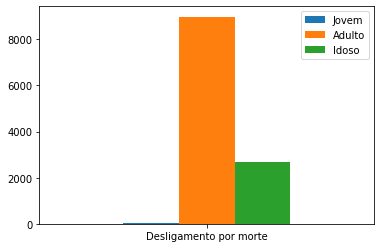

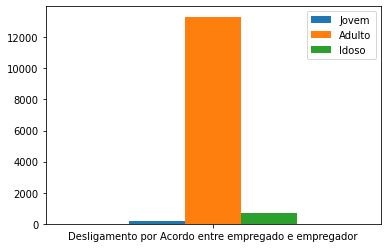

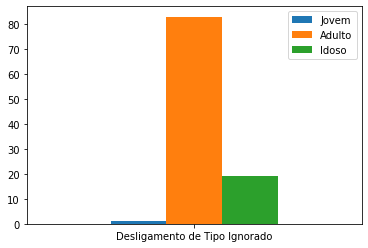

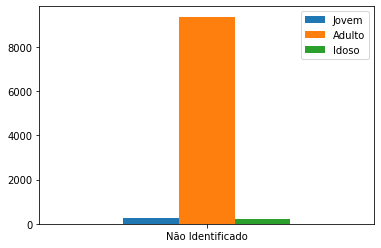

In [32]:
# Criando um dicionário

data31 = {"Jovem":[jovem[0]], "Adulto":[adulto[0]], "Idoso":[idoso[0]]};
data32 = {"Jovem":[jovem[1]], "Adulto":[adulto[1]], "Idoso":[idoso[1]]};
data33 = {"Jovem":[jovem[2]], "Adulto":[adulto[2]], "Idoso":[idoso[2]]};
data40 = {"Jovem":[jovem[3]], "Adulto":[adulto[3]], "Idoso":[idoso[3]]};
data43 = {"Jovem":[jovem[4]], "Adulto":[adulto[4]], "Idoso":[idoso[4]]};
data45 = {"Jovem":[jovem[5]], "Adulto":[adulto[5]], "Idoso":[idoso[5]]};
data50 = {"Jovem":[jovem[6]], "Adulto":[adulto[6]], "Idoso":[idoso[6]]};
data60 = {"Jovem":[jovem[7]], "Adulto":[adulto[7]], "Idoso":[idoso[7]]};
data90 = {"Jovem":[jovem[9]], "Adulto":[adulto[9]], "Idoso":[idoso[9]]};
data98 = {"Jovem":[jovem[10]], "Adulto":[adulto[10]], "Idoso":[idoso[10]]};
data99 = {"Jovem":[jovem[11]], "Adulto":[adulto[11]], "Idoso":[idoso[11]]};

index31     = ["Desligamento por demissão sem justa causa"];
index32     = ["Desligamento por demissão com justa causa"];
index33     = ["Culpa Recíproca"];
index40    = ["Desligamento a pedido"];
index43     = ["Término contrato trabalho prazo determinado"];
index45     = ["Desligamento por Término de contrato"];
index50     = ["Desligamento por aposentadoria"];
index60     = ["Desligamento por morte"];
index90     = ["Desligamento por Acordo entre empregado e empregador"];
index98    = ["Desligamento de Tipo Ignorado"];
index99     = ["Não Identificado"];

# Dictionary loaded into a DataFrame       

dataFrame31 = pd.DataFrame(data=data31, index=index31);
dataFrame32 = pd.DataFrame(data=data32, index=index32);
dataFrame33 = pd.DataFrame(data=data33, index=index33);
dataFrame40 = pd.DataFrame(data=data40, index=index40);
dataFrame43 = pd.DataFrame(data=data43, index=index43);
dataFrame45 = pd.DataFrame(data=data45, index=index45);
dataFrame50 = pd.DataFrame(data=data50, index=index50);
dataFrame60 = pd.DataFrame(data=data60, index=index60);
dataFrame90 = pd.DataFrame(data=data90, index=index90);
dataFrame98 = pd.DataFrame(data=data98, index=index98);
dataFrame99 = pd.DataFrame(data=data99, index=index99);
 

# Draw a vertical bar chart

dataFrame31.plot.bar(rot=0, title="");
dataFrame32.plot.bar(rot=0, title="");
dataFrame33.plot.bar(rot=0, title="");
dataFrame40.plot.bar(rot=0, title="");
dataFrame43.plot.bar(rot=0, title="");
dataFrame45.plot.bar(rot=0, title="");
dataFrame50.plot.bar(rot=0, title="");
dataFrame60.plot.bar(rot=0, title="");
dataFrame90.plot.bar(rot=0, title="");
dataFrame98.plot.bar(rot=0, title="");
dataFrame99.plot.bar(rot=0, title="");

## Índices da quantidade de demissões em Abril de 2021 com diferença salarial 

### Diferença salarial entre homens e mulheres demitidos

In [33]:
# Lista de Gêneros
# Homem - 1
# Mulher - 3
# Não Identificado - 9

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['sexo'], movimentacoes['salário'], movimentacoes['tipomovimentação']],  axis=1)
result = result.dropna()
result = result.reset_index(drop=True)

print(result)

         sexo      salário  tipomovimentação
0           1  1800.000000                20
1           1  1634.599976                10
2           1  1775.410034                20
3           3  1850.000000                20
4           1  1586.199951                99
...       ...          ...               ...
2642589     1  1440.000000                31
2642590     1  1167.119995                31
2642591     3  1303.000000                31
2642592     1  2056.560059                31
2642593     1  1188.310059                20

[2642594 rows x 3 columns]


In [34]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de demissão
homem = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mulher = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# códigos
codigos = [1,3]

#Lista para identificação de desligamentos
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]


for x in range(quant):
    j = 0
    genero = 0
    index = 0
    for y in codigos:
        if(result['sexo'][x] == y):
            genero = y
            break
        i = i + 1
    for z in desligamento:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
        
    if(genero == 1):
        homem[index] = homem[index] + round(result['salário'][x], 0)
    elif(genero == 3):
        mulher[index] = mulher[index] + round(result['salário'][x], 0)
        
    
print("Homem:",homem)
print("Mulher:",mulher)

Homem: [5860015975.0, 49932400.0, 5162278.0, 858976577.0, 303022366.0, 5287893.0, 3569415.0, 135099689.0, 0, 42053339.0, 174479.0, 12192644.0]
Mulher: [1911153854.0, 11606863.0, 1202492.0, 448763532.0, 129701615.0, 3381200.0, 2172771.0, 6351841.0, 0, 24239292.0, 35293.0, 4943574.0]


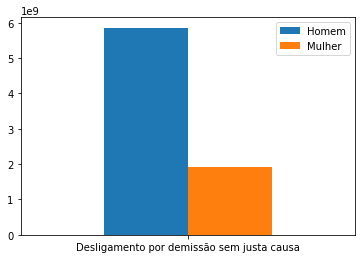

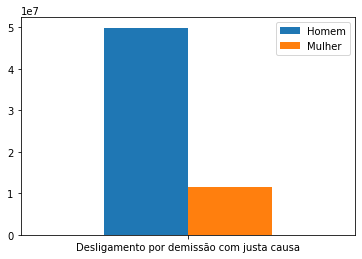

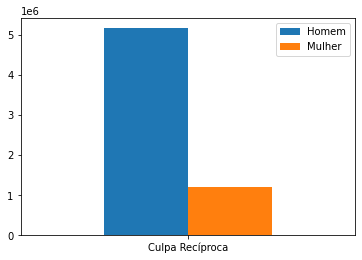

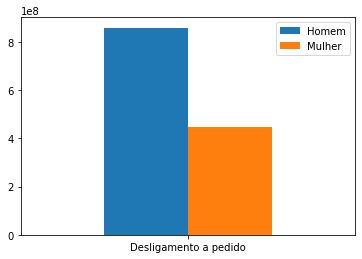

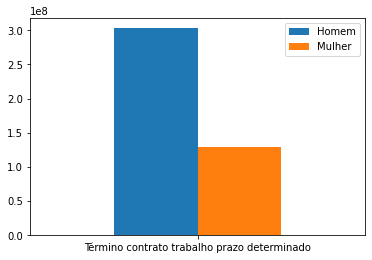

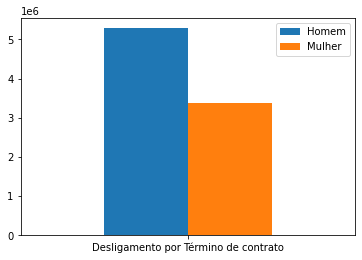

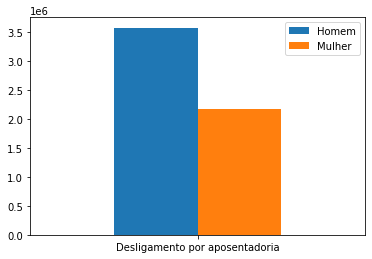

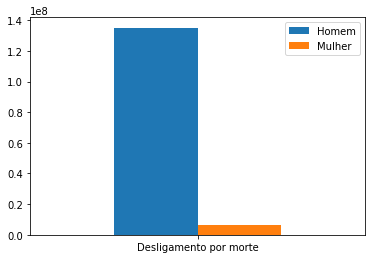

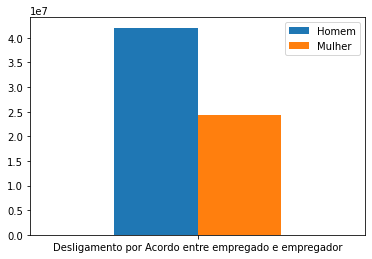

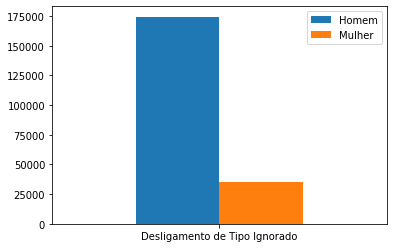

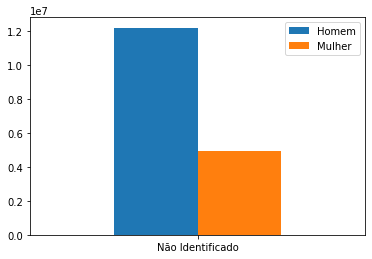

In [35]:
# Criando um dicionário

data31 = {"Homem":[homem[0]], "Mulher":[mulher[0]]};
data32 = {"Homem":[homem[1]], "Mulher":[mulher[1]]};
data33 = {"Homem":[homem[2]], "Mulher":[mulher[2]]};
data40 = {"Homem":[homem[3]], "Mulher":[mulher[3]]};
data43 = {"Homem":[homem[4]], "Mulher":[mulher[4]]};
data45 = {"Homem":[homem[5]], "Mulher":[mulher[5]]};
data50 = {"Homem":[homem[6]], "Mulher":[mulher[6]]};
data60 = {"Homem":[homem[7]], "Mulher":[mulher[7]]};
data90 = {"Homem":[homem[9]], "Mulher":[mulher[9]]};
data98 = {"Homem":[homem[10]], "Mulher":[mulher[10]]};
data99 = {"Homem":[homem[11]], "Mulher":[mulher[11]]};

index31     = ["Desligamento por demissão sem justa causa"];
index32     = ["Desligamento por demissão com justa causa"];
index33     = ["Culpa Recíproca"];
index40    = ["Desligamento a pedido"];
index43     = ["Término contrato trabalho prazo determinado"];
index45     = ["Desligamento por Término de contrato"];
index50     = ["Desligamento por aposentadoria"];
index60     = ["Desligamento por morte"];
index90     = ["Desligamento por Acordo entre empregado e empregador"];
index98    = ["Desligamento de Tipo Ignorado"];
index99     = ["Não Identificado"];

# Dictionary loaded into a DataFrame       

dataFrame31 = pd.DataFrame(data=data31, index=index31);
dataFrame32 = pd.DataFrame(data=data32, index=index32);
dataFrame33 = pd.DataFrame(data=data33, index=index33);
dataFrame40 = pd.DataFrame(data=data40, index=index40);
dataFrame43 = pd.DataFrame(data=data43, index=index43);
dataFrame45 = pd.DataFrame(data=data45, index=index45);
dataFrame50 = pd.DataFrame(data=data50, index=index50);
dataFrame60 = pd.DataFrame(data=data60, index=index60);
dataFrame90 = pd.DataFrame(data=data90, index=index90);
dataFrame98 = pd.DataFrame(data=data98, index=index98);
dataFrame99 = pd.DataFrame(data=data99, index=index99);
 

# Draw a vertical bar chart

dataFrame31.plot.bar(rot=0, title="");
dataFrame32.plot.bar(rot=0, title="");
dataFrame33.plot.bar(rot=0, title="");
dataFrame40.plot.bar(rot=0, title="");
dataFrame43.plot.bar(rot=0, title="");
dataFrame45.plot.bar(rot=0, title="");
dataFrame50.plot.bar(rot=0, title="");
dataFrame60.plot.bar(rot=0, title="");
dataFrame90.plot.bar(rot=0, title="");
dataFrame98.plot.bar(rot=0, title="");
dataFrame99.plot.bar(rot=0, title="");

### Diferença salarial entre homens e mulheres admitidos

In [36]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de admissão
homem = [0, 0, 0, 0, 0]
mulher = [0, 0, 0, 0, 0]

# códigos
codigos = [1,3]

#Lista para identificação de admissão
admitidos = [10, 20, 25, 35, 70]


for x in range(quant):
    j = 0
    genero = 0
    index = 0
    for y in codigos:
        if(result['sexo'][x] == y):
            genero = y
            break
        i = i + 1
    for z in admitidos:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
    
    if(genero == 1 and result['salário'][x]):
        homem[index] = homem[index] + round(result['salário'][x], 0)
    elif(genero == 3 and result['salário'][x]):
        mulher[index] = mulher[index] + round(result['salário'][x], 0)
        

print("Homem:",homem)
print("Mulher:",mulher)

Homem: [5088923627.0, 2181329177.0, 4227953.0, 1006298.0, 0]
Mulher: [1535976272.0, 1000699197.0, 5369296.0, 1507562.0, 0]


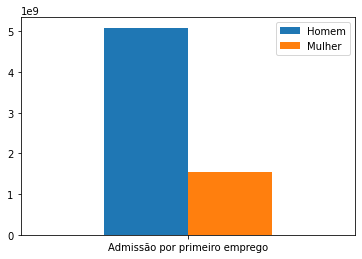

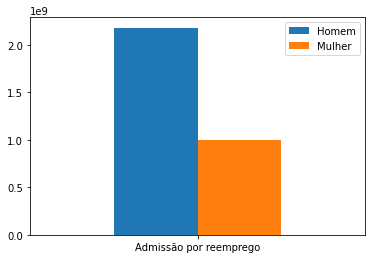

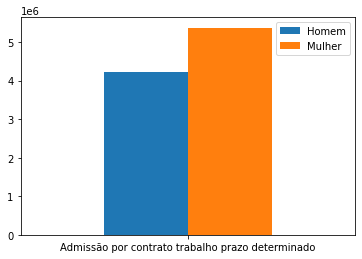

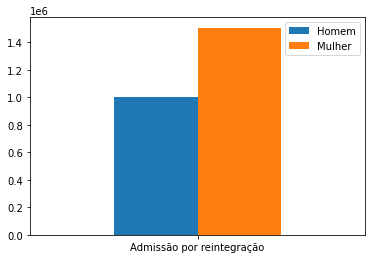

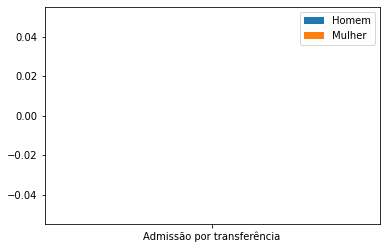

In [37]:
# Criando um dicionário

data10 = {"Homem":[homem[0]], "Mulher":[mulher[0]]};
data20 = {"Homem":[homem[1]], "Mulher":[mulher[1]]};
data25 = {"Homem":[homem[2]], "Mulher":[mulher[2]]};
data35 = {"Homem":[homem[3]], "Mulher":[mulher[3]]};

index10     = ["Admissão por primeiro emprego"];
index20     = ["Admissão por reemprego"];
index25     = ["Admissão por contrato trabalho prazo determinado"];
index35    = ["Admissão por reintegração"];

 

# Dictionary loaded into a DataFrame       

dataFrame10 = pd.DataFrame(data=data10, index=index10);
dataFrame20 = pd.DataFrame(data=data20, index=index20);
dataFrame25 = pd.DataFrame(data=data25, index=index25);
dataFrame35 = pd.DataFrame(data=data35, index=index35);

 

# Draw a vertical bar chart

dataFrame10.plot.bar(rot=0, title="");
dataFrame20.plot.bar(rot=0, title="");
dataFrame25.plot.bar(rot=0, title="");
dataFrame35.plot.bar(rot=0, title="");

### Média salarial por raça/cor

In [38]:
# Lista de Raça/Cor
# Branca - 1
# Preta - 2
# Parda - 3
# Amarela - 4
# Indígena - 5
# Não informada - 6
# Não identificado - 9

#Linha para concatenar (juntar) as duas colunas necessárias para este gráfico
result = pd.concat([movimentacoes['raçacor'], movimentacoes['salário'], movimentacoes['tipomovimentação']],  axis=1)
result = result.dropna()
result = result.reset_index(drop=True)

print(result)

         raçacor      salário  tipomovimentação
0              6  1800.000000                20
1              2  1634.599976                10
2              3  1775.410034                20
3              6  1850.000000                20
4              9  1586.199951                99
...          ...          ...               ...
2642589        6  1440.000000                31
2642590        3  1167.119995                31
2642591        1  1303.000000                31
2642592        3  2056.560059                31
2642593        1  1188.310059                20

[2642594 rows x 3 columns]


In [39]:
#Variável que pega a quantidade limite de dados a serem trabalhados
quant = result.shape[0]

#Lista com índices específicos para cada causa de demissão
branca = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
brancaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
preta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pretaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
parda = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pardaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
amarela = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
amarelaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
indigena = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
indigenaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoInformada = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoInformadaQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoIdentificado = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
naoIdentificadoQuant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# códigos
codigos = [1,2, 3, 4, 5, 6, 9]

#Lista para identificação de desligamentos
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]


for x in range(quant):
    i = 0
    j = 0
    raca = 0
    index = 0
    for y in codigos:
        if(result['raçacor'][x] == y):
            raca = y
            break
        i = i + 1
    for z in desligamento:
        if(result['tipomovimentação'][x] == z):
            index = j
            break
        j = j + 1
        
    if(raca == 1):
        branca[index] = branca[index] + round(result['salário'][x], 0)
        brancaQuant[index] = brancaQuant[index] + 1
    elif(raca == 2):
        preta[index] = preta[index] + round(result['salário'][x], 0)
        pretaQuant[index] = pretaQuant[index] + 1
    elif(raca == 3):
        parda[index] = parda[index] + round(result['salário'][x], 0)
        pardaQuant[index] = pardaQuant[index] + 1
    elif(raca == 4):
        amarela[index] = amarela[index] + round(result['salário'][x], 0)
        amarelaQuant[index] = amarelaQuant[index] + 1
    elif(raca == 5):
        indigena[index] = indigena[index] + round(result['salário'][x], 0)
        indigenaQuant[index] = indigenaQuant[index] + 1
    elif(raca == 6):
        naoInformada[index] = naoInformada[index] + round(result['salário'][x], 0)
        naoInformadaQuant[index] = naoInformadaQuant[index] + 1
    elif(raca == 9):
        naoIdentificado[index] = naoIdentificado[index] + round(result['salário'][x], 0)
        naoIdentificadoQuant[index] = naoIdentificadoQuant[index] + 1
    
print("Branca:", branca)
print("Preta:", preta)
print("Parda:", parda)
print("Amarela:", amarela)
print("Indigena:", indigena)
print("Não Informada:", naoInformada)
print("Não Identificado:", naoIdentificado)

Branca: [3922367746.0, 40168734.0, 1440460.0, 707381208.0, 167229853.0, 3536367.0, 3926834.0, 66667889.0, 0, 40385172.0, 101462.0, 0]
Preta: [439832592.0, 2983276.0, 639871.0, 110724406.0, 26211793.0, 529732.0, 173967.0, 55491859.0, 0, 2573391.0, 11695.0, 0]
Parda: [2116014413.0, 10625061.0, 3073914.0, 242918066.0, 136718097.0, 2587616.0, 1093086.0, 13298275.0, 0, 16352188.0, 73206.0, 0]
Amarela: [28463228.0, 149959.0, 5047.0, 6812736.0, 1378929.0, 34260.0, 132600.0, 237172.0, 0, 241450.0, 0, 0]
Indigena: [9081523.0, 54327.0, 0, 1191299.0, 2272327.0, 22206.0, 9798.0, 46763.0, 0, 27099.0, 0, 0]
Não Informada: [1255410327.0, 7557906.0, 1205478.0, 238712394.0, 98912982.0, 1958912.0, 405901.0, 5709572.0, 0, 6713331.0, 23409.0, 0]
Não Identificado: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17136218.0]


In [40]:
for x in range(12):
    if(branca[x] != 0 and brancaQuant[x] != 0):
        branca[x] = round((branca[x]/brancaQuant[x]), 0)
        
    if(preta[x] != 0 and pretaQuant[x] != 0):
        preta[x] = round((preta[x]/pretaQuant[x]), 0)
        
    if(parda[x] != 0 and pardaQuant[x] != 0):
        parda[x] = round((parda[x]/pardaQuant[x]), 0)
        
    if(amarela[x] != 0 and amarelaQuant[x] != 0):
        amarela[x] = round((amarela[x]/amarelaQuant[x]), 0)
        
    if(indigena[x] != 0 and indigenaQuant[x] != 0):
        indigena[x] = round((indigena[x]/indigenaQuant[x]), 0)
        
    if(naoInformada[x] != 0 and naoInformadaQuant[x] != 0):
        naoInformada[x] = round((naoInformada[x]/naoInformadaQuant[x]), 0)
        
    if(naoIdentificado[x] != 0 and naoIdentificadoQuant[x] != 0):
        naoIdentificado[x] = round((naoIdentificado[x]/naoIdentificadoQuant[x]), 0)
        
    

print("Branca:", branca)
print("Preta:", preta)
print("Parda:", parda)
print("Amarela:", amarela)
print("Indigena:", indigena)
print("Não Informada:", naoInformada)
print("Não Identificado:", naoIdentificado)


Branca: [5232.0, 7658.0, 2940.0, 4654.0, 2039.0, 1723.0, 4120.0, 11420.0, 0, 6378.0, 2537.0, 0]
Preta: [3725.0, 2283.0, 6094.0, 6141.0, 1827.0, 1553.0, 2383.0, 86301.0, 0, 3530.0, 1462.0, 0]
Parda: [2988.0, 1679.0, 4194.0, 2380.0, 1685.0, 1678.0, 3020.0, 3624.0, 0, 3921.0, 1743.0, 0]
Amarela: [2974.0, 1704.0, 841.0, 3354.0, 1499.0, 1428.0, 5765.0, 3294.0, 0, 3136.0, 0, 0]
Indigena: [2585.0, 1358.0, 0, 1963.0, 1340.0, 1708.0, 3266.0, 1871.0, 0, 1936.0, 0, 0]
Não Informada: [2950.0, 2967.0, 7630.0, 3361.0, 2326.0, 1602.0, 2537.0, 3932.0, 0, 2351.0, 1801.0, 0]
Não Identificado: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1742.0]


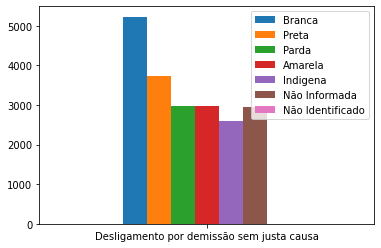

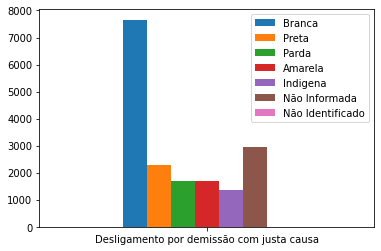

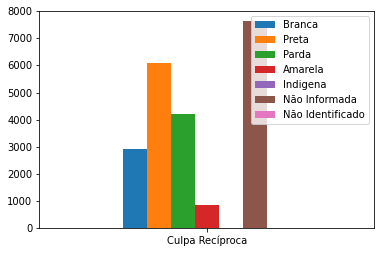

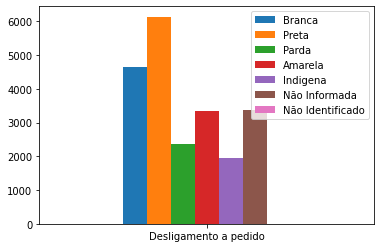

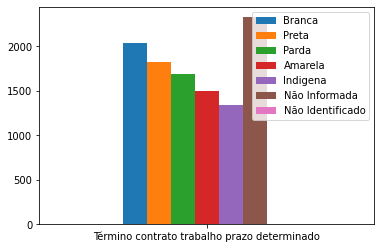

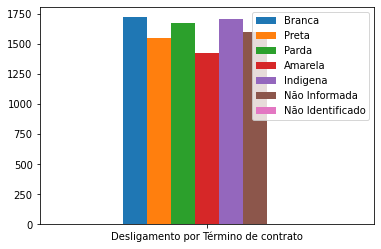

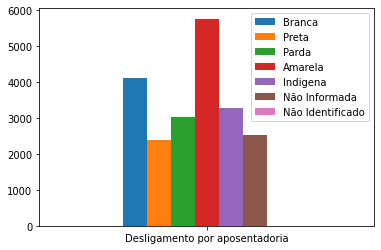

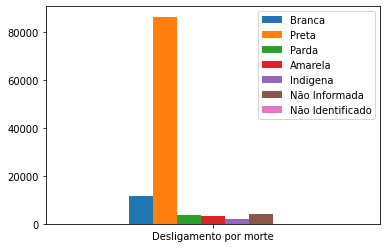

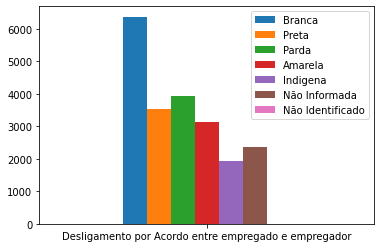

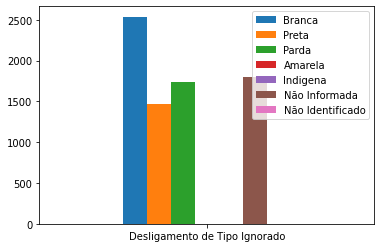

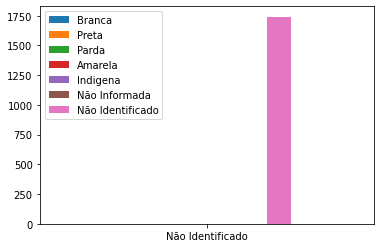

In [41]:
# Criando um dicionário

data31 = {"Branca":[branca[0]], "Preta":[preta[0]], "Parda":[parda[0]], "Amarela":[amarela[0]],
          "Indigena":[indigena[0]], "Não Informada":[naoInformada[0]],
          "Não Identificado":[naoIdentificado[0]],};
index31     = ["Desligamento por demissão sem justa causa"];
 
data32 = {"Branca":[branca[1]], "Preta":[preta[1]], "Parda":[parda[1]], "Amarela":[amarela[1]],
          "Indigena":[indigena[1]], "Não Informada":[naoInformada[1]],
          "Não Identificado":[naoIdentificado[1]],};
index32     = ["Desligamento por demissão com justa causa"];

data33 = {"Branca":[branca[2]], "Preta":[preta[2]], "Parda":[parda[2]], "Amarela":[amarela[2]],
          "Indigena":[indigena[2]], "Não Informada":[naoInformada[2]],
          "Não Identificado":[naoIdentificado[2]],};
index33     = ["Culpa Recíproca"];

data40 = {"Branca":[branca[3]], "Preta":[preta[3]], "Parda":[parda[3]], "Amarela":[amarela[3]],
          "Indigena":[indigena[3]], "Não Informada":[naoInformada[3]],
          "Não Identificado":[naoIdentificado[3]],};
index40     = ["Desligamento a pedido"];

data43 = {"Branca":[branca[4]], "Preta":[preta[4]], "Parda":[parda[4]], "Amarela":[amarela[4]],
          "Indigena":[indigena[4]], "Não Informada":[naoInformada[4]],
          "Não Identificado":[naoIdentificado[4]],};
index43     = ["Término contrato trabalho prazo determinado"];

data45 = {"Branca":[branca[5]], "Preta":[preta[5]], "Parda":[parda[5]], "Amarela":[amarela[5]],
          "Indigena":[indigena[5]], "Não Informada":[naoInformada[5]],
          "Não Identificado":[naoIdentificado[2]],};
index45     = ["Desligamento por Término de contrato"];

data50 = {"Branca":[branca[6]], "Preta":[preta[6]], "Parda":[parda[6]], "Amarela":[amarela[6]],
          "Indigena":[indigena[6]], "Não Informada":[naoInformada[6]],
          "Não Identificado":[naoIdentificado[6]],};
index50     = ["Desligamento por aposentadoria"];

data60 = {"Branca":[branca[7]], "Preta":[preta[7]], "Parda":[parda[7]], "Amarela":[amarela[7]],
          "Indigena":[indigena[7]], "Não Informada":[naoInformada[7]],
          "Não Identificado":[naoIdentificado[2]],};
index60     = ["Desligamento por morte"];


data90 = {"Branca":[branca[9]], "Preta":[preta[9]], "Parda":[parda[9]], "Amarela":[amarela[9]],
          "Indigena":[indigena[9]], "Não Informada":[naoInformada[9]],
          "Não Identificado":[naoIdentificado[9]],};
index90     = ["Desligamento por Acordo entre empregado e empregador"];

data98 = {"Branca":[branca[10]], "Preta":[preta[10]], "Parda":[parda[10]], "Amarela":[amarela[10]],
          "Indigena":[indigena[10]], "Não Informada":[naoInformada[10]],
          "Não Identificado":[naoIdentificado[10]],};
index98     = ["Desligamento de Tipo Ignorado"];

data99 = {"Branca":[branca[11]], "Preta":[preta[11]], "Parda":[parda[11]], "Amarela":[amarela[11]],
          "Indigena":[indigena[11]], "Não Informada":[naoInformada[11]],
          "Não Identificado":[naoIdentificado[11]],};
index99     = ["Não Identificado"];
# Dictionary loaded into a DataFrame       

dataFrame31 = pd.DataFrame(data=data31, index=index31);
dataFrame32 = pd.DataFrame(data=data32, index=index32);
dataFrame33 = pd.DataFrame(data=data33, index=index33);
dataFrame40 = pd.DataFrame(data=data40, index=index40);
dataFrame43 = pd.DataFrame(data=data43, index=index43);
dataFrame45 = pd.DataFrame(data=data45, index=index45);
dataFrame50 = pd.DataFrame(data=data50, index=index50);
dataFrame60 = pd.DataFrame(data=data60, index=index60);
dataFrame90 = pd.DataFrame(data=data90, index=index90);
dataFrame98 = pd.DataFrame(data=data98, index=index98);
dataFrame99 = pd.DataFrame(data=data99, index=index99);

 
desligamento = [31, 32, 33, 40, 43, 45, 50, 60, 80, 90, 98, 99]
# Draw a vertical bar chart
dataFrame31.plot.bar(rot=0, title="");
dataFrame32.plot.bar(rot=0, title="");
dataFrame33.plot.bar(rot=0, title="");
dataFrame40.plot.bar(rot=0, title="");
dataFrame43.plot.bar(rot=0, title="");
dataFrame45.plot.bar(rot=0, title="");
dataFrame50.plot.bar(rot=0, title="");
dataFrame60.plot.bar(rot=0, title="");
dataFrame90.plot.bar(rot=0, title="");
dataFrame98.plot.bar(rot=0, title="");
dataFrame99.plot.bar(rot=0, title="");
